In [4]:
from fastai.basics import *

path = untar_data(URLs.ML_100k)

In [5]:
!ls {path}

README	   u.data   u.item	  u1.base  u2.test  u4.base  u5.test  ub.base
allbut.pl  u.genre  u.occupation  u1.test  u3.base  u4.test  ua.base  ub.test
mku.sh	   u.info   u.user	  u2.base  u3.test  u5.base  ua.test


In [14]:
!head {path}/"u.data"

196	242	3	881250949
186	302	3	891717742
22	377	1	878887116
244	51	2	880606923
166	346	1	886397596
298	474	4	884182806
115	265	2	881171488
253	465	5	891628467
305	451	3	886324817
6	86	3	883603013


In [43]:
ratings = pd.read_csv(path/"u.data", delimiter="\t", header=None,
                      names=["user", "movie", "rating", "timestamp"])
ratings

,user,movie,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596
...,...,...,...,...
99995,880,476,3,880175444
99996,716,204,5,879795543
99997,276,1090,1,874795795
99998,13,225,2,882399156


In [35]:
!head {path}/"u.item" | awk -F'|' '{{OFS="|"; print $$1, $$2, $$3, $$4, $$5}}'

1|Toy Story (1995)|01-Jan-1995||http://us.imdb.com/M/title-exact?Toy%20Story%20(1995)
2|GoldenEye (1995)|01-Jan-1995||http://us.imdb.com/M/title-exact?GoldenEye%20(1995)
3|Four Rooms (1995)|01-Jan-1995||http://us.imdb.com/M/title-exact?Four%20Rooms%20(1995)
4|Get Shorty (1995)|01-Jan-1995||http://us.imdb.com/M/title-exact?Get%20Shorty%20(1995)
5|Copycat (1995)|01-Jan-1995||http://us.imdb.com/M/title-exact?Copycat%20(1995)
6|Shanghai Triad (Yao a yao yao dao waipo qiao) (1995)|01-Jan-1995||http://us.imdb.com/Title?Yao+a+yao+yao+dao+waipo+qiao+(1995)
7|Twelve Monkeys (1995)|01-Jan-1995||http://us.imdb.com/M/title-exact?Twelve%20Monkeys%20(1995)
8|Babe (1995)|01-Jan-1995||http://us.imdb.com/M/title-exact?Babe%20(1995)
9|Dead Man Walking (1995)|01-Jan-1995||http://us.imdb.com/M/title-exact?Dead%20Man%20Walking%20(1995)
10|Richard III (1995)|22-Jan-1996||http://us.imdb.com/M/title-exact?Richard%20III%20(1995)


In [42]:
movies = pd.read_csv(path/"u.item", delimiter="|", header=None,
                     names=["movie", "title"], usecols=(0, 1), encoding="latin-1")
movies

,movie,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)
...,...,...
1677,1678,Mat' i syn (1997)
1678,1679,B. Monkey (1998)
1679,1680,Sliding Doors (1998)
1680,1681,You So Crazy (1994)


In [44]:
ratings = ratings.merge(movies)
ratings

,user,movie,rating,timestamp,title
0,196,242,3,881250949,Kolya (1996)
1,63,242,3,875747190,Kolya (1996)
2,226,242,5,883888671,Kolya (1996)
3,154,242,3,879138235,Kolya (1996)
4,306,242,5,876503793,Kolya (1996)
...,...,...,...,...,...
99995,840,1674,4,891211682,Mamma Roma (1962)
99996,655,1640,3,888474646,"Eighth Day, The (1996)"
99997,655,1637,3,888984255,Girls Town (1996)
99998,655,1630,3,887428735,"Silence of the Palace, The (Saimt el Qusur) (1994)"


In [45]:
from fastai.collab import *

dls = CollabDataLoaders.from_df(ratings, item_name="title", bs=64, device="cpu")
dls.show_batch()

,user,title,rating
0,831,"People vs. Larry Flynt, The (1996)",3
1,716,Mission: Impossible (1996),4
2,224,"Man Without a Face, The (1993)",4
3,486,Breaking the Waves (1996),4
4,222,Leaving Las Vegas (1995),5
5,90,Cemetery Man (Dellamorte Dellamore) (1994),5
6,851,Pulp Fiction (1994),5
7,297,Amadeus (1984),3
8,880,"Devil's Own, The (1997)",2
9,538,Return of the Jedi (1983),3


In [52]:
dls.classes

{'user': ['#na#', 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 

In [54]:
n_users = len(dls.classes["user"])
n_movies = len(dls.classes["title"])
n_factors = 5

user_factors = torch.rand(n_users, n_factors)-0.5
movies_factors = torch.rand(n_movies, n_factors)-0.5

n_users, n_movies


(944, 1665)

In [56]:
class DotProduct(Module):
    def __init__(self, n_users, n_movies, n_factors):
        self.user_factors = Embedding(n_users, n_factors)
        self.movie_factors = Embedding(n_movies, n_factors)

    def forward(self, x):
        users = self.user_factors(x[:, 0])
        movies = self.movie_factors(x[:, 1])
        return (users * movies).sum(1)

In [57]:
x, y = dls.one_batch()
x.shape, y.shape

(torch.Size([64, 2]), torch.Size([64, 1]))

In [58]:
model = DotProduct(n_users, n_movies, 50)
learn = Learner(dls, model, loss_func=MSELossFlat())

In [59]:
learn.fit_one_cycle(5, 5e-3)

epoch,train_loss,valid_loss,time
0,1.357911,1.282959,00:06
1,1.075936,1.102440,00:06
2,1.022569,1.002735,00:06
3,0.862903,0.907899,00:06
4,0.811407,0.890101,00:06


In [60]:
class DotProduct(Module):
    def __init__(self, n_users, n_movies, n_factors, y_range=(0, 5.5)):
        self.user_factors = Embedding(n_users, n_factors)
        self.movie_factors = Embedding(n_movies, n_factors)
        self.y_range = y_range

    def forward(self, x):
        users = self.user_factors(x[:, 0])
        movies = self.movie_factors(x[:, 1])
        a = (users * movies).sum(1)
        return sigmoid_range(a, *self.y_range)

In [63]:
model = DotProduct(n_users, n_movies, 50)
learn = Learner(dls, model, loss_func=MSELossFlat())
learn.fit_one_cycle(5, 5e-3)

epoch,train_loss,valid_loss,time
0,0.963489,0.970678,00:06
1,0.863598,0.901249,00:06
2,0.665401,0.867019,00:06
3,0.471155,0.870507,00:06
4,0.362848,0.874045,00:06


In [66]:
model = DotProduct(n_users, n_movies, 50)
learn = Learner(dls, model, loss_func=MSELossFlat())
learn.fit_one_cycle(5, 5e-3, wd=0.01)

epoch,train_loss,valid_loss,time
0,1.015898,1.003411,00:06
1,0.872334,0.905204,00:06
2,0.708970,0.869640,00:06
3,0.477474,0.873379,00:06
4,0.370685,0.877965,00:06


In [76]:
def create_params(size):
    return nn.Parameter(torch.randn(size)*0.01)

In [77]:
class DotProduct(Module):
    def __init__(self, n_users, n_movies, n_factors, y_range=(0, 5.5)):
        self.user_factors = create_params([n_users, n_factors])
        self.user_bias = create_params(n_users)
        self.movie_factors = create_params([n_movies, n_factors])
        self.movie_bias = create_params(n_movies)
        self.y_range = y_range

    def forward(self, x):
        users = self.user_factors[x[:, 0]]
        movies = self.movie_factors[x[:, 1]]
        a = (users * movies).sum(1)
        a += self.user_bias[x[:, 0]]
        a += self.movie_bias[x[:, 1]]
        return sigmoid_range(a, *self.y_range)

In [83]:
model = DotProduct(n_users, n_movies, 50)
learn = Learner(dls, model, loss_func=MSELossFlat())
learn.fit_one_cycle(5, 5e-3, wd=0.2)

epoch,train_loss,valid_loss,time
0,0.942539,0.937409,00:07
1,0.884447,0.876320,00:07
2,0.803019,0.846622,00:07
3,0.717134,0.821681,00:07
4,0.662403,0.819631,00:07


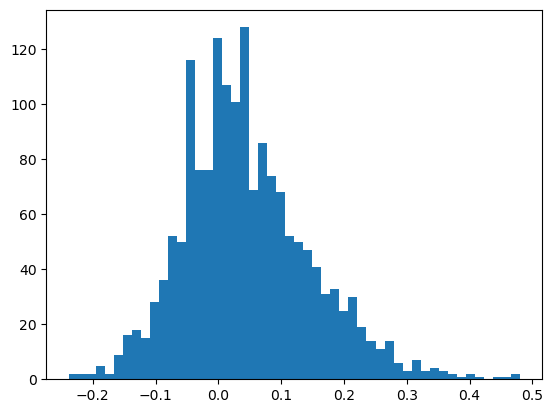

In [89]:
plt.hist(model.movie_bias.detach(), 50);

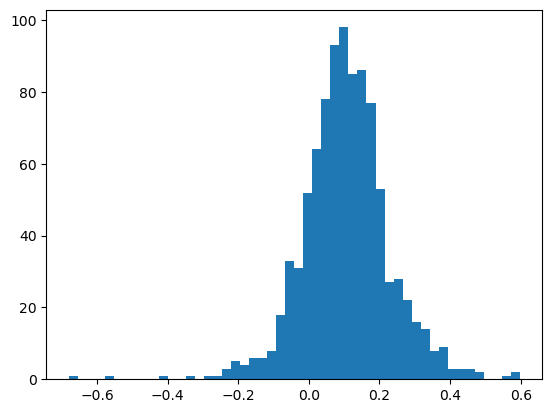

In [90]:
plt.hist(model.user_bias.detach(), 50);

In [96]:
movie_bias = learn.model.movie_bias
idxs = movie_bias.argsort()

print("Worst movies:")
for i in range(5): 
    print(dls.classes["title"][idxs[i]], movie_bias[idxs[i]].item())

print()

print("Best movies:")
for i in range(5): 
    print(dls.classes["title"][idxs[-(1+i)]], movie_bias[idxs[-(1+i)]].item())


Worst movies:
Children of the Corn: The Gathering (1996) -0.23807062208652496
Island of Dr. Moreau, The (1996) -0.22483405470848083
Leave It to Beaver (1997) -0.21908241510391235
Mortal Kombat: Annihilation (1997) -0.21329018473625183
Crow: City of Angels, The (1996) -0.20485641062259674

Best movies:
Schindler's List (1993) 0.47989577054977417
Titanic (1997) 0.4757975935935974
L.A. Confidential (1997) 0.45554685592651367
Shawshank Redemption, The (1994) 0.43684497475624084
Silence of the Lambs, The (1991) 0.4214676320552826


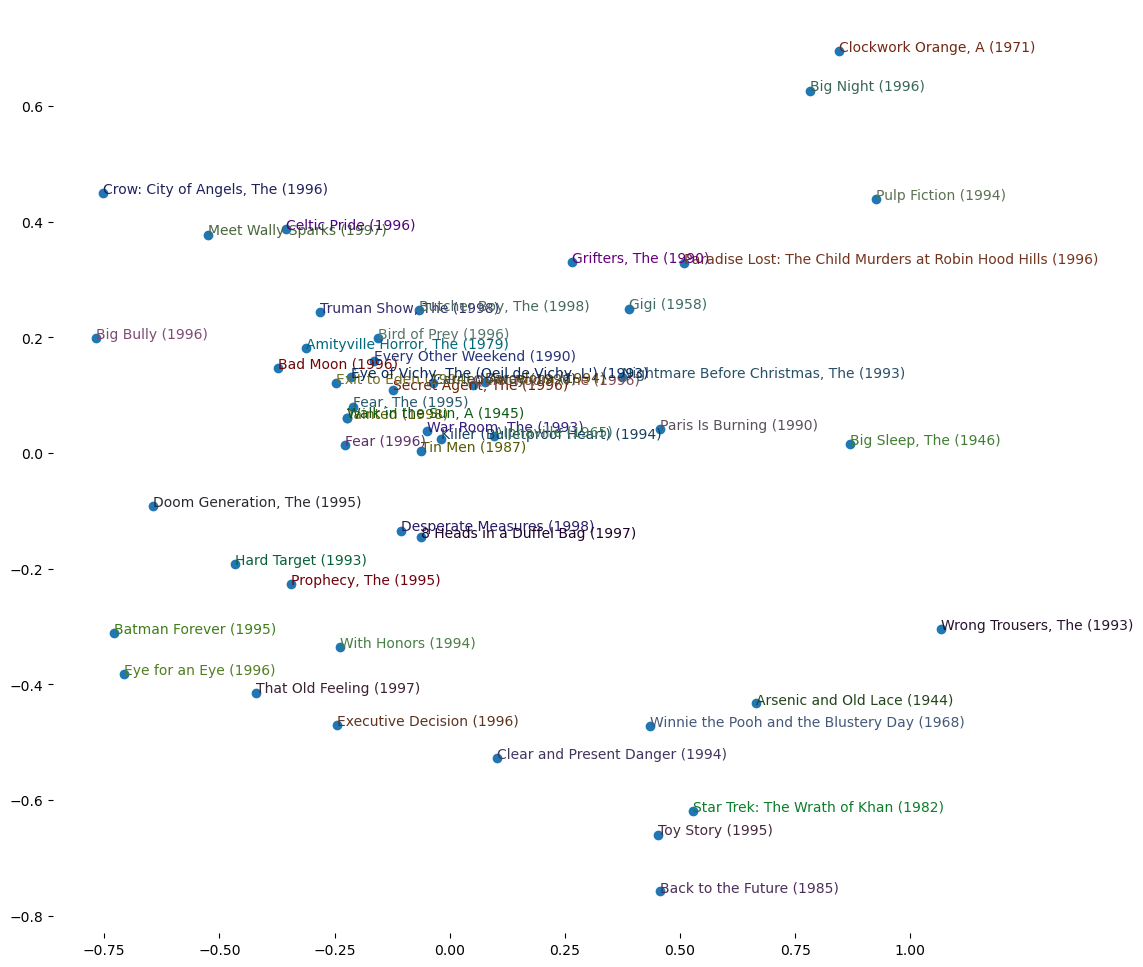

In [181]:
top_movies = ratings[ratings.groupby("movie")["rating"].transform("mean") >= ratings["rating"].mean()].groupby("movie")["rating"].mean().sort_values(ascending=False).index.values[:50]
top_idxs = tensor(top_movies)
movie_w = learn.model.movie_factors[top_idxs].detach()
movie_pca = movie_w.pca(2)
pc1, pc2 = movie_pca[:, 0], movie_pca[:, 1]
plt.figure(figsize=(12, 12))
plt.scatter(pc1, pc2)
for i, x, y in zip(top_movies, pc1, pc2):
    plt.text(x, y, next(k for k, v in learn.dls.classes["title"].o2i.items() if v == i), color=np.random.rand(3)*0.5)
plt.box(False)

In [187]:
learn = collab_learner(dls, n_factors=50, y_range=(0, 5.5))
learn.fit_one_cycle(5, 5e-3, wd=0.1)

epoch,train_loss,valid_loss,time
0,0.941462,0.943769,00:07
1,0.851456,0.866028,00:07
2,0.738420,0.829450,00:07
3,0.592994,0.812778,00:07
4,0.495746,0.813401,00:07


In [188]:
learn.model

EmbeddingDotBias(
  (u_weight): Embedding(944, 50)
  (i_weight): Embedding(1665, 50)
  (u_bias): Embedding(944, 1)
  (i_bias): Embedding(1665, 1)
)

In [192]:
movie_bias = learn.model.i_bias.weight.squeeze()
idxs = movie_bias.argsort()

print("Worst movies:")
for i in range(5): 
    print(dls.classes["title"][idxs[i]], movie_bias[idxs[i]].item())

print()

print("Best movies:")
for i in range(5): 
    print(dls.classes["title"][idxs[-(1+i)]], movie_bias[idxs[-(1+i)]].item())


Worst movies:
Children of the Corn: The Gathering (1996) -0.3357316851615906
Robocop 3 (1993) -0.3120400607585907
Mortal Kombat: Annihilation (1997) -0.3001090884208679
Cable Guy, The (1996) -0.2873106896877289
Lawnmower Man 2: Beyond Cyberspace (1996) -0.2860546112060547

Best movies:
Schindler's List (1993) 0.6064605116844177
Titanic (1997) 0.5586152672767639
L.A. Confidential (1997) 0.5524090528488159
Shawshank Redemption, The (1994) 0.5416829586029053
Silence of the Lambs, The (1991) 0.5389770269393921


In [218]:
movie_factors = learn.model.i_weight.weight
query = "Schindler's List (1993)"
idx = learn.dls.classes["title"].o2i[query]
distances = nn.CosineSimilarity(dim=1)(movie_factors, movie_factors[None, idx])
idx = distances.argsort(descending=True)

print("Most similar movies to:", query)
for i in range(5):
    ix = idx[i+1]
    m = dls.classes["title"][ix]
    print(m, "%0.4f" % distances[ix].item())

Most similar movies to: Schindler's List (1993)
Ayn Rand: A Sense of Life (1997) 0.8112
One Flew Over the Cuckoo's Nest (1975) 0.7937
Women, The (1939) 0.7847
When Harry Met Sally... (1989) 0.7836
Everest (1998) 0.7812


In [221]:
from fastai.tabular.all import *

embs = get_emb_sz(dls)
embs

[(944, 74), (1665, 102)]

In [224]:
class CollabNN(Module):
    def __init__(self, user_sz, item_sz, y_range=(0, 5.5), n_act=100):
        self.user_factors = Embedding(*user_sz)
        self.item_factors = Embedding(*item_sz)
        self.y_range = y_range
        self.layers = nn.Sequential(
            nn.Linear(user_sz[1]+item_sz[1], n_act),
            nn.ReLU(),
            nn.Linear(n_act, 1)
        )
    
    def forward(self, x):
        embs = self.user_factors(x[:, 0]), self.item_factors(x[:, 1])
        x = self.layers(torch.cat(embs, dim=1))
        return sigmoid_range(x, *self.y_range)


In [229]:
model = CollabNN(*embs)
learn = Learner(dls, model, loss_func=MSELossFlat())
learn.fit_one_cycle(5, 5e-3, wd=0.01)

epoch,train_loss,valid_loss,time
0,0.950021,0.941662,00:08
1,0.894445,0.894818,00:08
2,0.855715,0.875506,00:08
3,0.835533,0.863267,00:08
4,0.764882,0.867180,00:08


In [230]:
learn = collab_learner(dls, y_range=(0, 5.5), use_nn=True, layers=[100, 50])
learn.fit_one_cycle(5, 5e-3, wd=0.1)

epoch,train_loss,valid_loss,time
0,0.982322,0.965646,00:09
1,0.920292,0.934211,00:09
2,0.909036,0.885548,00:09
3,0.850862,0.866680,00:09
4,0.776666,0.872588,00:09
